In [1]:
import matplotlib.backends.backend_pdf as pdf_backend
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data.csv")
df.head()

,Salary,Experience,Technology,Java,Backend,QA,Manual,Automation,.NET,Web dev,...,Data Scientist,Baze,Blockchain,SAP consultatnt,Unity dev,Cyber Security,Penetration tester,Data Engineer,Django,Vue
0,550,0.0,.NET,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2000,4.0,Java Backend,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2600,6.0,"QA automation (JS, Java)",1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2500,4.0,.NET Web Dev,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1200,2.0,Java Backend,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
value_counts = df.apply(pd.Series.value_counts)
columns_to_drop = value_counts.columns[value_counts.loc[1] == 1]
df = df.drop(columns=columns_to_drop)

In [4]:
def subset(column_name):
    return df[df[column_name] == 1].reset_index(drop=True)

In [5]:
pdf = PdfPages('generated_images.pdf')

def ploting(pdf, data_frame, kolona, dictionary):
    x = data_frame['Experience']
    y = data_frame['Salary']
    slope, intercept = np.polyfit(x, y, 1)
    
    plt.figure(figsize=(8, 6))
    sns.set(style='ticks', palette='colorblind')
    sns.regplot(x=x, y=y, color='steelblue', scatter_kws={'s': 50, 'marker': 'o', 'edgecolor': 'black'})
    plt.plot(x, slope * x + intercept, color='red', label='Line of Best Fit')
    
    plt.xlabel('Experience in Years', fontsize=12)
    plt.ylabel('Salary in Euros', fontsize=12)
    plt.title(f'Technology: {kolona} \n Number of data points: {dictionary[kolona]}', fontsize=14, fontweight='bold')
    
    plt.legend()
    plt.grid(True, alpha=0.5)
    pdf.savefig()
    
    plt.show()
    plt.close()

In [6]:
column_names = df.columns.tolist()
final_col_names = column_names[3:]

my_dict = {}
for column in final_col_names:
    my_dict[column] = sum(1 for value in df[column] if value == 1)
    
sorted_dict = dict(sorted(my_dict.items(), key=lambda x: x[1], reverse=True))

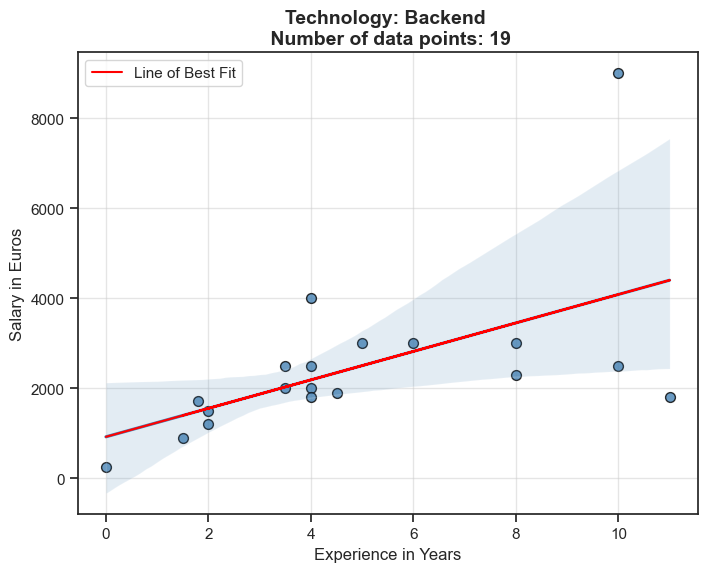

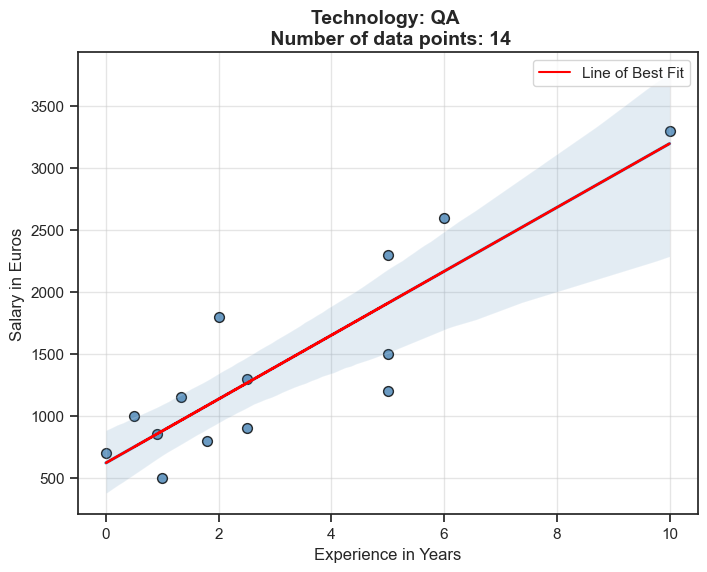

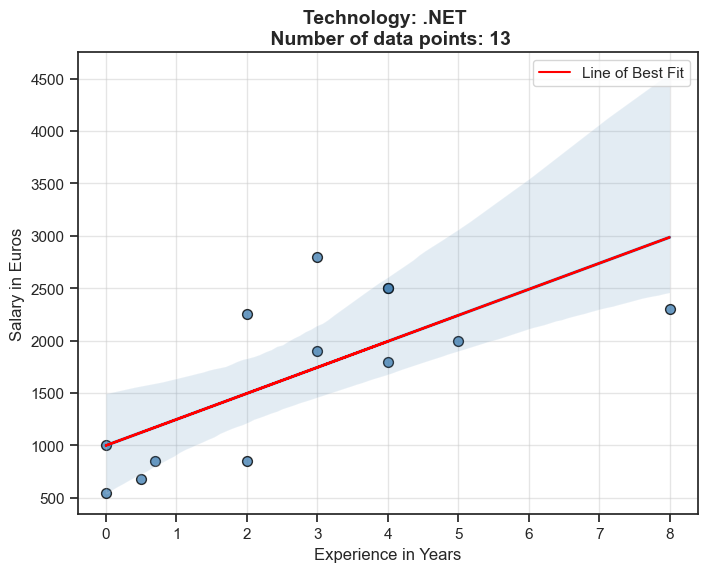

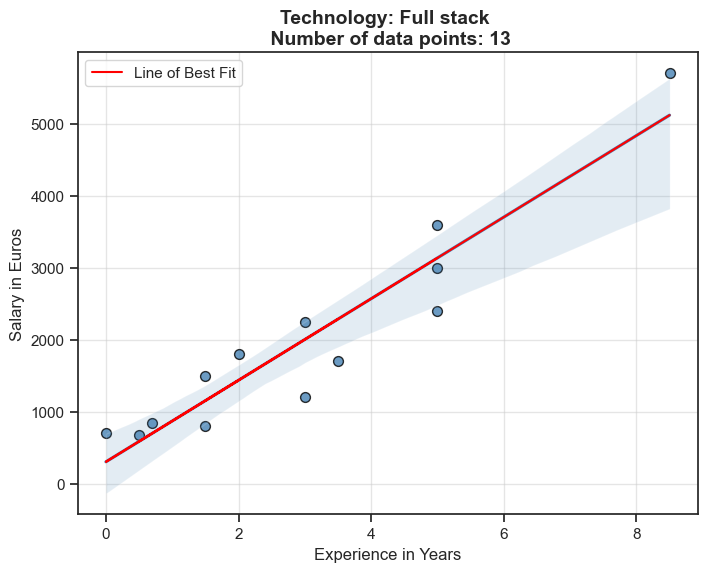

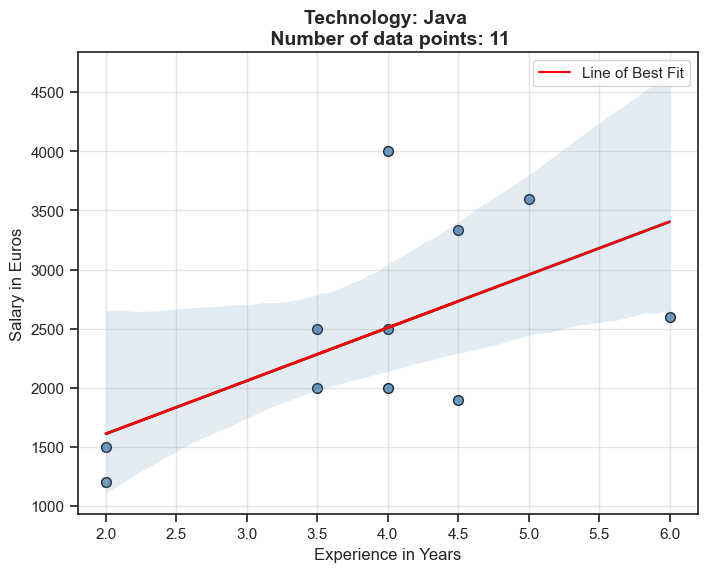

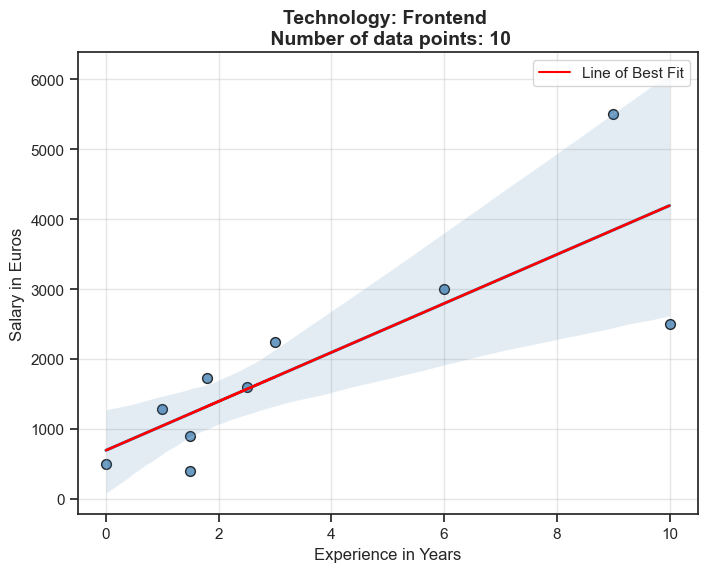

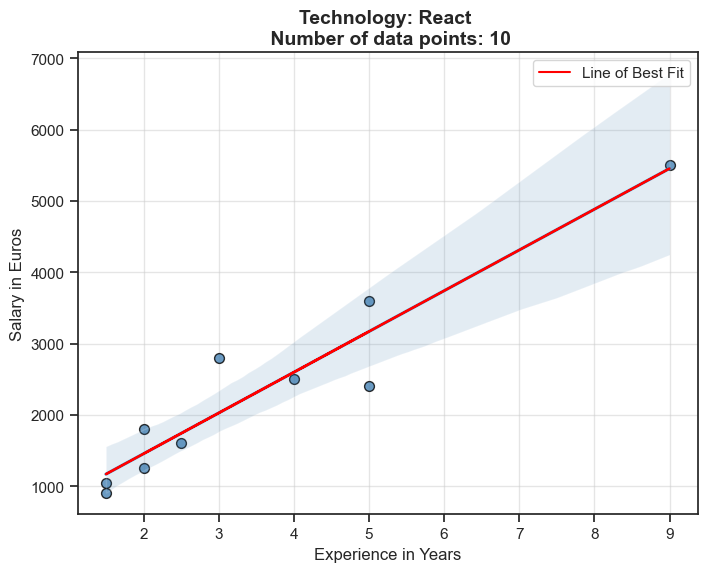

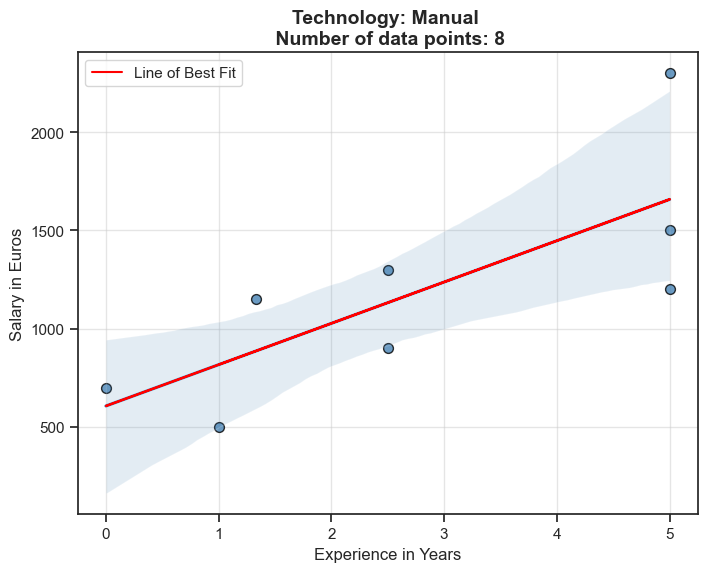

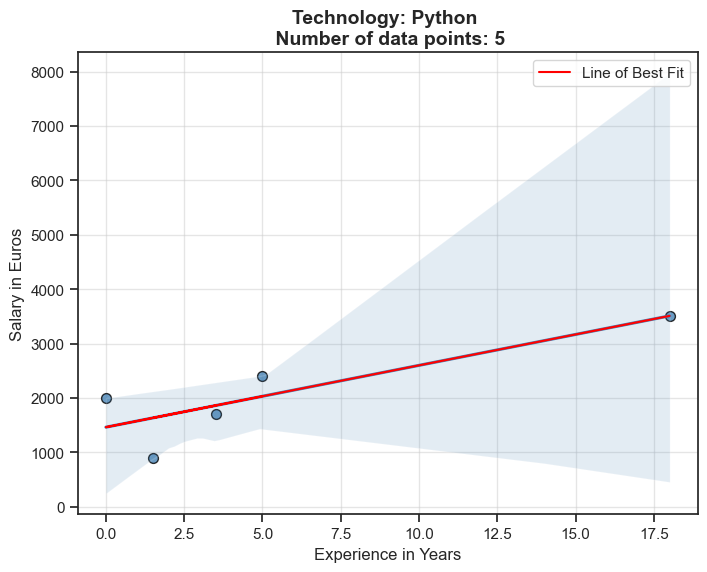

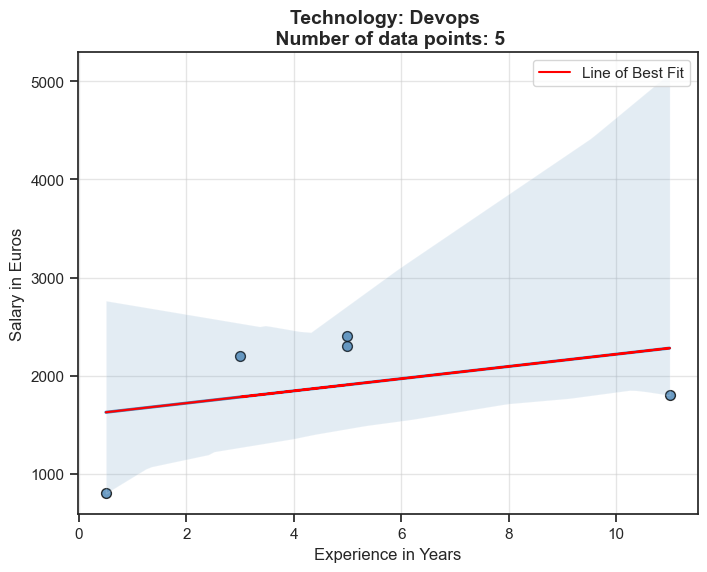

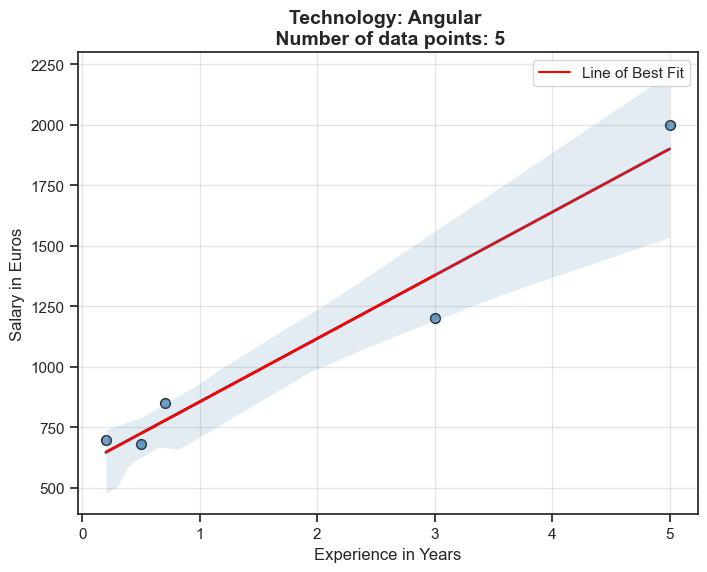

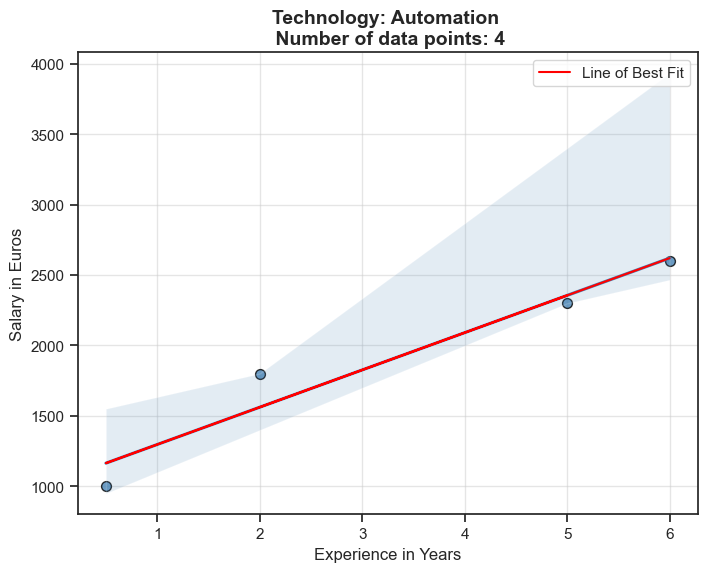

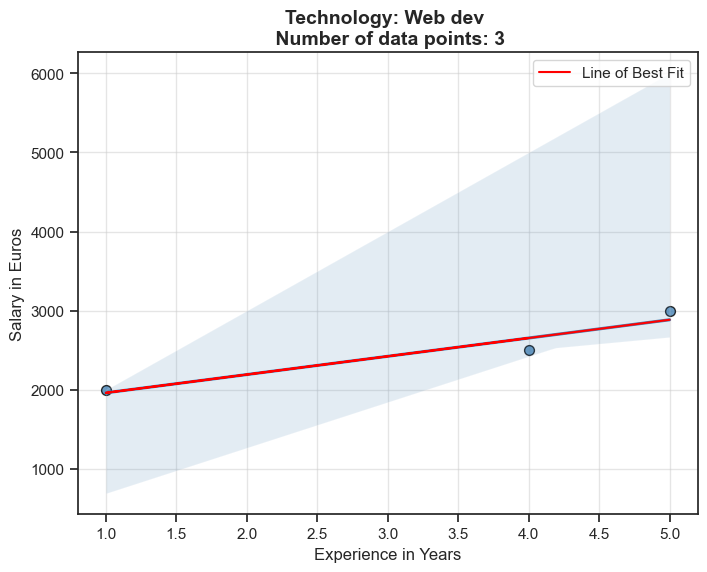

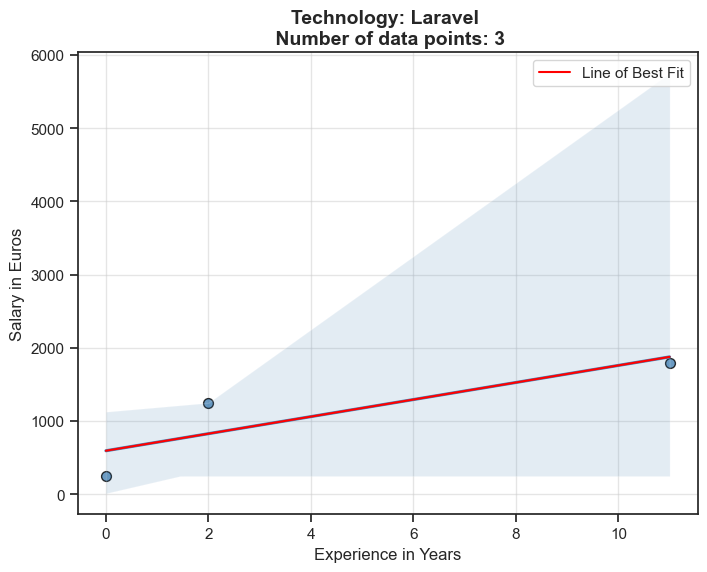

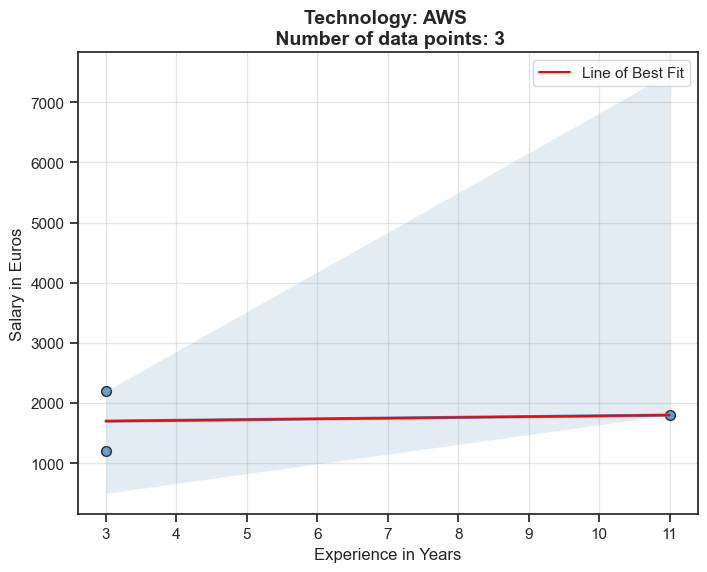

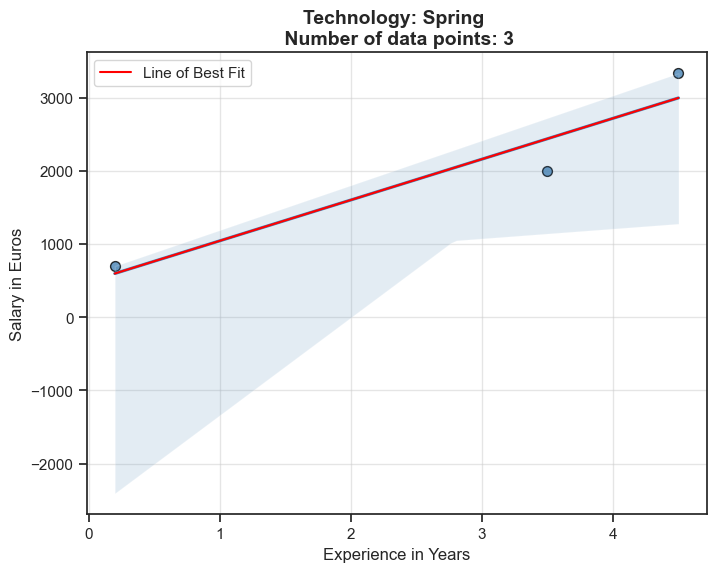

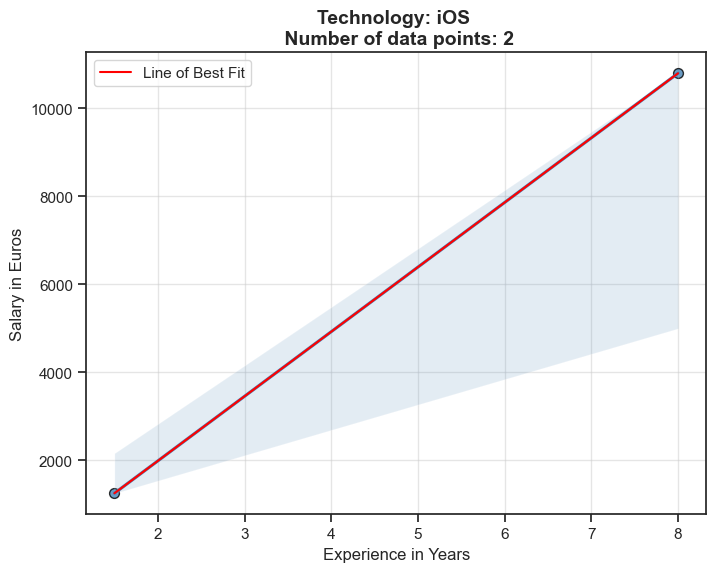

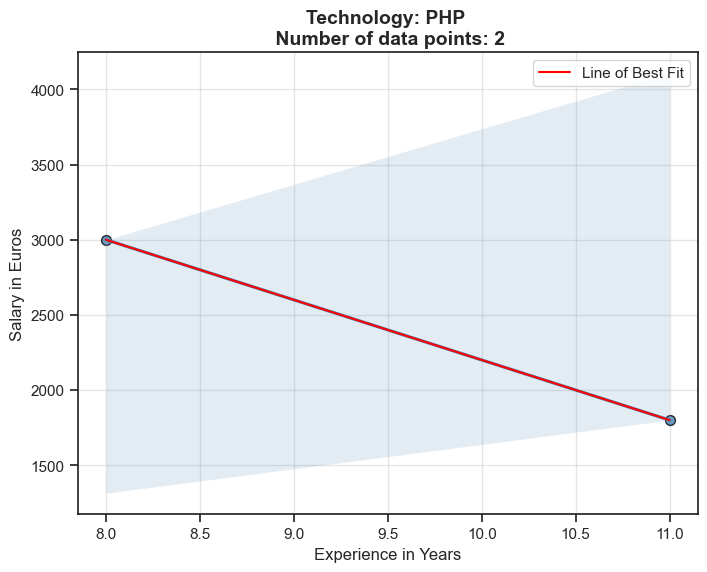

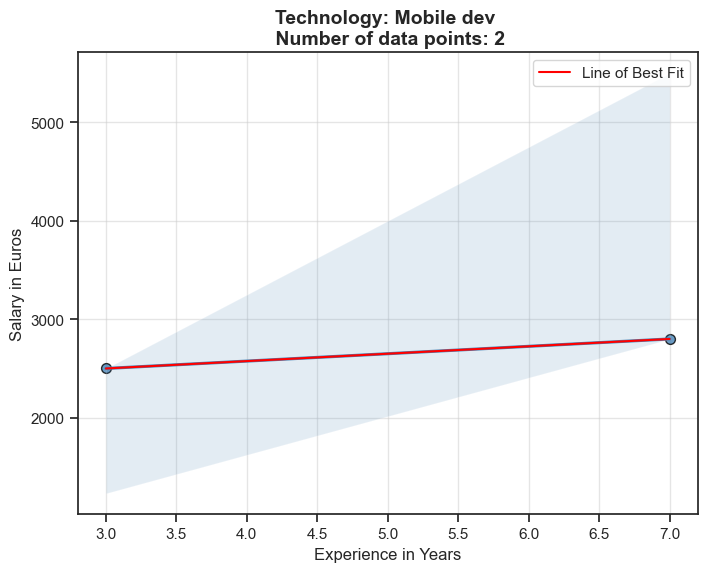

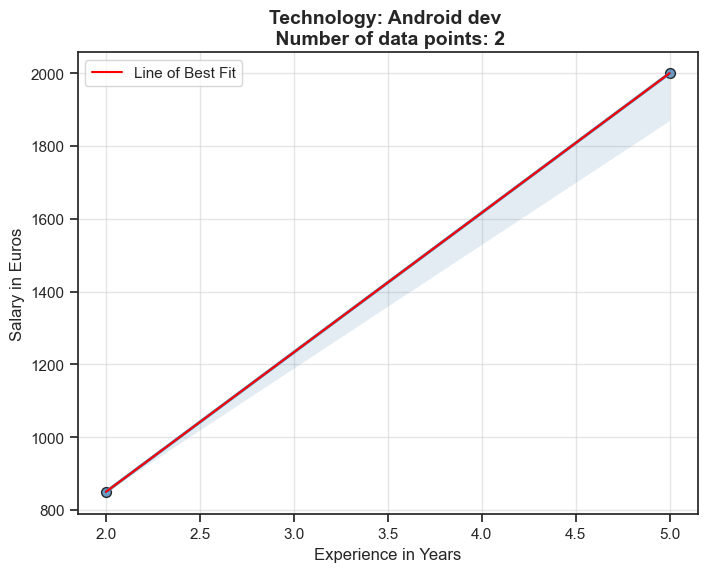

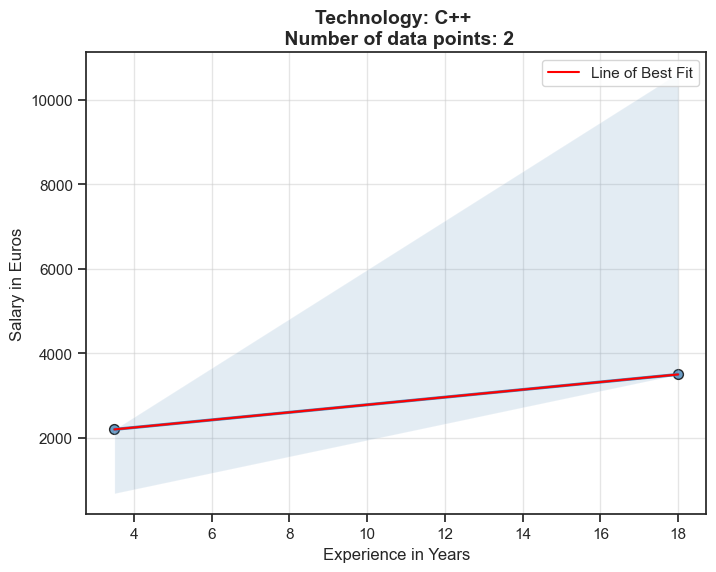

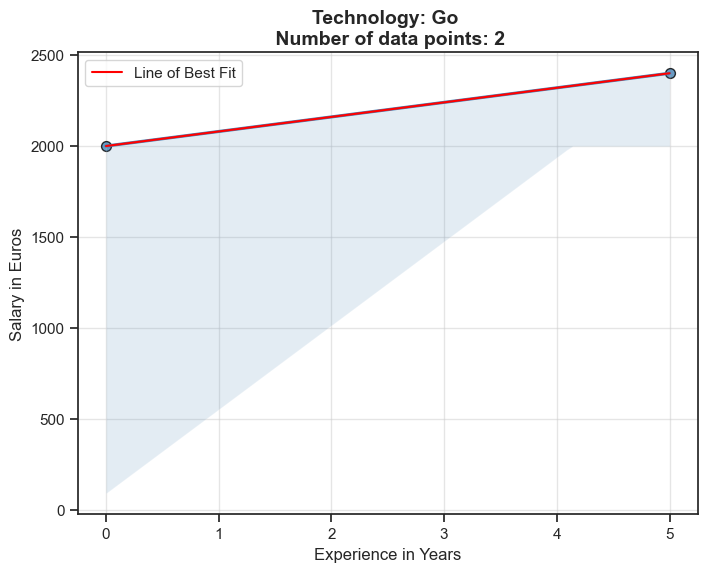

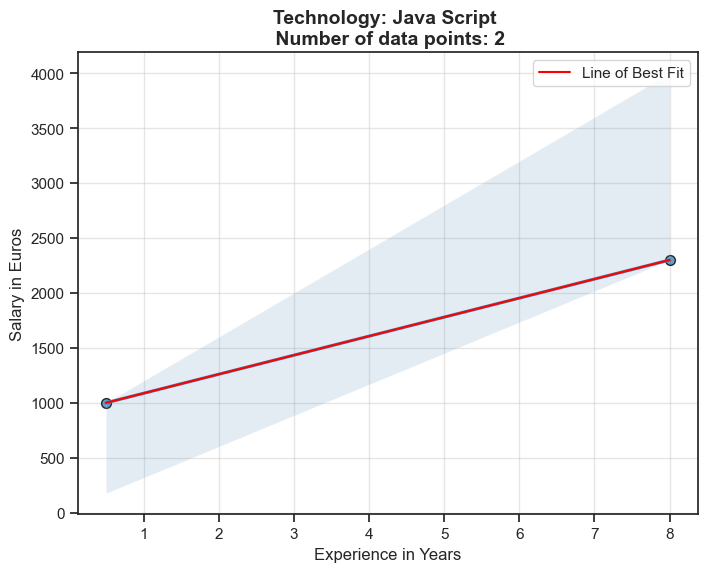

In [7]:
for key in list(sorted_dict.keys()):
    ploting(pdf, subset(key), key, sorted_dict)

pdf.close()

### Histograms

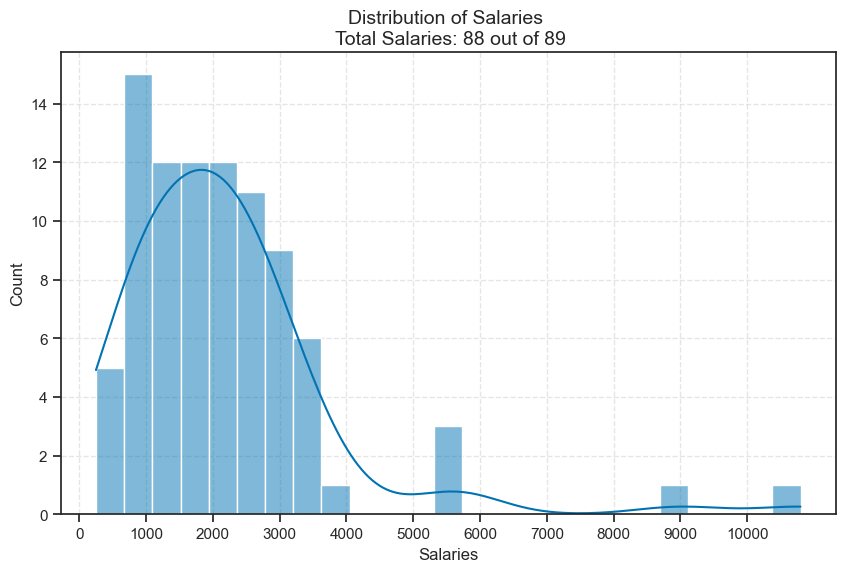

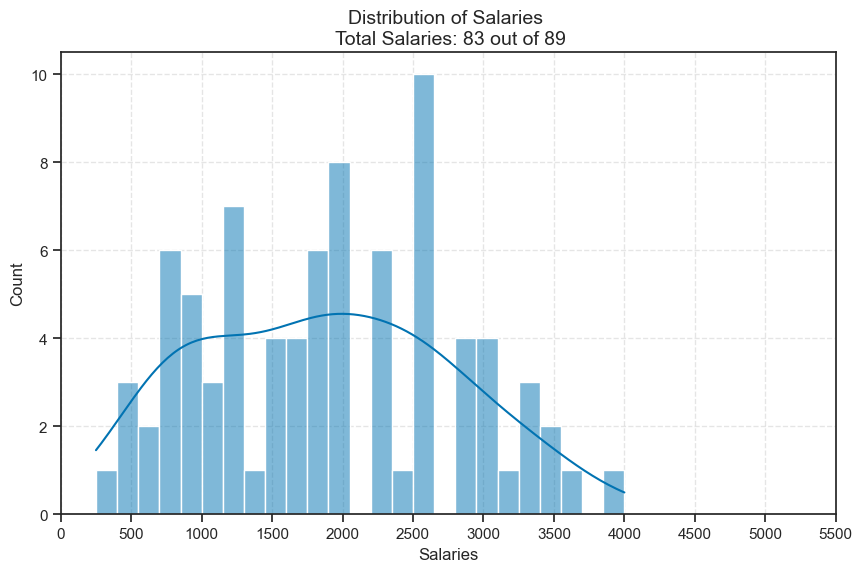

In [8]:
salary = sorted(df['Salary'])

with PdfPages('salary_histograms.pdf') as pdf:
    
    # Plot 1
    plt.figure(figsize=(10, 6))
    sns.set_palette("colorblind")
    sns.histplot(salary[:-1], kde=True, bins=25, legend=True)
    plt.xlabel('Salaries', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(f'Distribution of Salaries \n Total Salaries: {len(salary[:-1])} out of {len(salary)}', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    custom_ticks = list(range(0, 10000 + 1, 1000))
    plt.xticks(custom_ticks)
    pdf.savefig()
    plt.show()
    plt.close()

    # Plot 2
    plt.figure(figsize=(10, 6))
    sns.set_palette("colorblind")
    sns.histplot(salary[:83], kde=True, bins=25, legend=True)
    plt.xlabel('Salaries', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(f'Distribution of Salaries \n Total Salaries: {len(salary[:83])} out of {len(salary)}', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    custom_ticks = list(range(0, 5500 + 1, 500))
    plt.xticks(custom_ticks)
    pdf.savefig()
    plt.show()
    plt.close()